In [1]:
# import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

plt.style.use('fivethirtyeight')
%matplotlib inline 

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB , BernoulliNB

In [2]:
import missingno as msno

In [4]:
df_cb = pd.read_csv("custombank.csv")
df_cb.head()

,age,marital,balance,loan,y
0,30,married,1787,no,no
1,33,married,4789,yes,no
2,35,single,1350,no,no
3,30,married,1476,yes,no
4,59,married,0,no,no


In [5]:
df_cb.tail()

,age,marital,balance,loan,y
4516,33,married,-333,no,no
4517,57,married,-3313,yes,no
4518,57,married,295,no,no
4519,28,married,1137,no,no
4520,44,single,1136,yes,no


In [6]:
df_cb.describe()

,age,balance
count,4521.000000,4521.000000
mean,41.170095,1422.657819
std,10.576211,3009.638142
min,19.000000,-3313.000000
25%,33.000000,69.000000
50%,39.000000,444.000000
75%,49.000000,1480.000000
max,87.000000,71188.000000


In [7]:
##Check for Nan Values

<AxesSubplot:>

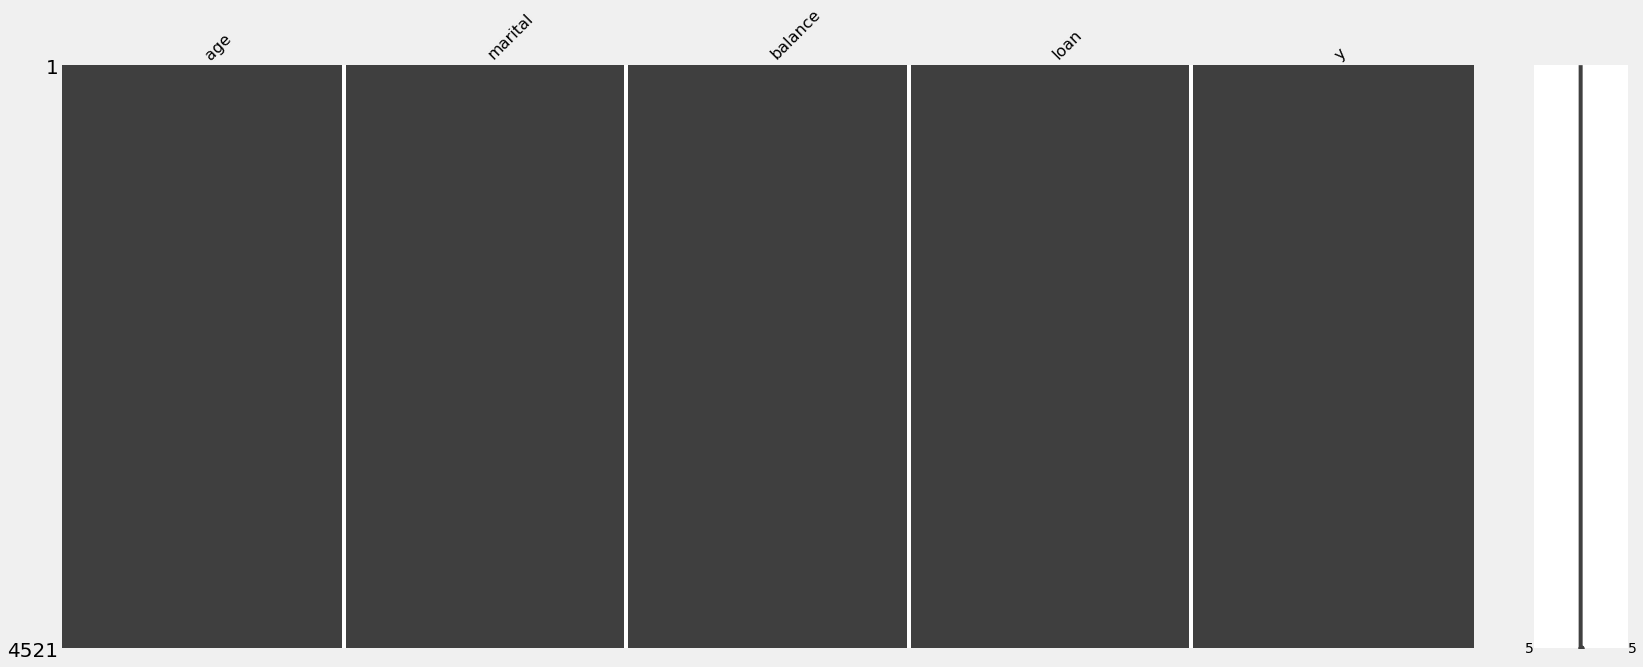

In [8]:
msno.matrix(df_cb)

In [11]:
df_cb2=pd.get_dummies(df_cb,columns=['marital','loan','y'],drop_first=True)

In [12]:
df_cb2.head()

,age,balance,marital_married,marital_single,loan_yes,y_yes
0,30,1787,1,0,0,0
1,33,4789,1,0,1,0
2,35,1350,0,1,0,0
3,30,1476,1,0,1,0
4,59,0,1,0,0,0


In [13]:
df_cb2.tail()

,age,balance,marital_married,marital_single,loan_yes,y_yes
4516,33,-333,1,0,0,0
4517,57,-3313,1,0,1,0
4518,57,295,1,0,0,0
4519,28,1137,1,0,0,0
4520,44,1136,0,1,1,0


In [18]:
X=df_cb2.iloc[:,:-1]
X

,age,balance,marital_married,marital_single,loan_yes
0,30,1787,1,0,0
1,33,4789,1,0,1
2,35,1350,0,1,0
3,30,1476,1,0,1
4,59,0,1,0,0
...,...,...,...,...,...
4516,33,-333,1,0,0
4517,57,-3313,1,0,1
4518,57,295,1,0,0
4519,28,1137,1,0,0


In [19]:
y=df_cb2.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y_yes, Length: 4521, dtype: uint8

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## DECISION TREE 

In [59]:
from sklearn import tree
from sklearn.tree import plot_tree

In [29]:
dt_class = DecisionTreeClassifier()
dt_class.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred_dt_class=dt_class.predict(X_test)
y_pred_dt_class

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [42]:
#dt_class2 = DecisionTreeClassifier(criterion='gini')
#dt_class2.fit(X_train,y_train)

In [43]:
#y_pred_dt_class2=dt_class2.predict(X_test)
#y_pred_dt_class2

In [44]:
print("Accuracy on dt_class:",accuracy_score(y_test,y_pred_dt_class))
#print("Accuracy on dt_class2:",accuracy_score(y_test,y_pred_dt_class2))


Accuracy on dt_class: 0.8054818744473917


In [45]:
##Implementing Max Depth

In [46]:
dt_md2 = DecisionTreeClassifier(max_depth=2)

In [47]:
dt_md2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [48]:
y_pred_dt_md2=dt_md2.predict(X_test)
y_pred_dt_md2

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [49]:
print("Accuracy on dt_class:",accuracy_score(y_test,y_pred_dt_md2))

Accuracy on dt_class: 0.8894783377541998


[Text(0.6535604984299861, 0.9838709677419355, 'X[0] <= 60.5\ngini = 0.206\nsamples = 3390\nvalue = [2994, 396]'),
 Text(0.35046445421254113, 0.9516129032258065, 'X[2] <= 0.5\ngini = 0.194\nsamples = 3292\nvalue = [2933, 359]'),
 Text(0.06708472736332574, 0.9193548387096774, 'X[1] <= 26635.5\ngini = 0.238\nsamples = 1279\nvalue = [1102, 177]'),
 Text(0.06505992351619844, 0.8870967741935484, 'X[0] <= 20.5\ngini = 0.237\nsamples = 1278\nvalue = [1102, 176]'),
 Text(0.013920526449000253, 0.8548387096774194, 'X[1] <= 835.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.011895722601872943, 0.8225806451612904, 'X[1] <= 296.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.009870918754745633, 0.7903225806451613, 'X[0] <= 19.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.007846114907618324, 0.7580645161290323, 'X[1] <= 51.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.005821311060491015, 0.7258064516129032, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.009870918

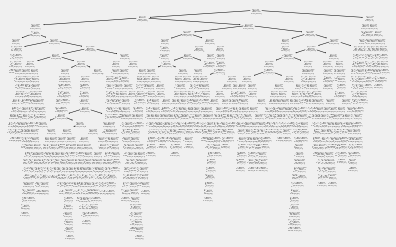

In [60]:
plot_tree(dt_class)

[Text(0.5, 0.8333333333333334, 'X[0] <= 60.5\ngini = 0.206\nsamples = 3390\nvalue = [2994, 396]'),
 Text(0.25, 0.5, 'X[2] <= 0.5\ngini = 0.194\nsamples = 3292\nvalue = [2933, 359]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.238\nsamples = 1279\nvalue = [1102, 177]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.164\nsamples = 2013\nvalue = [1831, 182]'),
 Text(0.75, 0.5, 'X[1] <= 976.0\ngini = 0.47\nsamples = 98\nvalue = [61, 37]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.415\nsamples = 51\nvalue = [36, 15]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.498\nsamples = 47\nvalue = [25, 22]')]

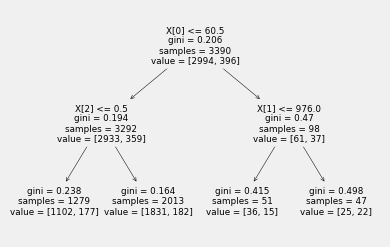

In [61]:
plot_tree(dt_md2)

## Naive Bayes

In [64]:
clssfr_gb = GaussianNB()
clssfr_gb.fit(X_train, y_train)

GaussianNB()

In [65]:
clssfr_gb.score(X_test, y_test)

0.8894783377541998

In [68]:
clssfr_bb = BernoulliNB()
clssfr_bb.fit(X_train, y_train)

BernoulliNB()

In [69]:
clssfr_bb.score(X_test, y_test)

0.8894783377541998